In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Binomial distribution sampling
http://www.chadfulton.com/topics/bernoulli_trials_bayesian.html

- is the plot correct?
- What is the seed for?
- use the seed for replication of your experiments

22


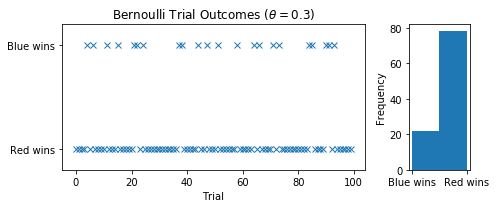

In [6]:
import matplotlib.gridspec as gridspec
# Simulate data
np.random.seed(123)

nobs = 100
theta = 0.3
Y = np.random.binomial(1, theta, nobs)
print(Y.sum())
# Plot the data
fig = plt.figure(figsize=(7,3))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1]) 
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.plot(range(nobs), Y, 'x')
ax2.hist(-Y, bins=2)

ax1.yaxis.set(ticks=(0,1), ticklabels=('Red wins', 'Blue wins'))
ax2.xaxis.set(ticks=(-1,0), ticklabels=('Blue wins', 'Red wins'));

ax1.set(title=r'Bernoulli Trial Outcomes $(\theta=0.3)$', xlabel='Trial', ylim=(-0.2, 1.2))
ax2.set(ylabel='Frequency')

fig.tight_layout()

## Sample a Gaussian

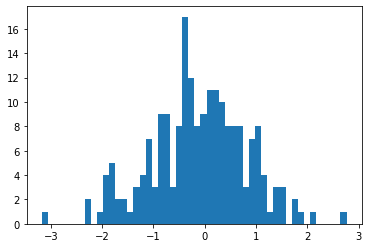

In [35]:
m = 200
sample = np.random.normal(0,1,m)
plt.hist(sample, bins = 50)
plt.show()

### How many sample do we need?

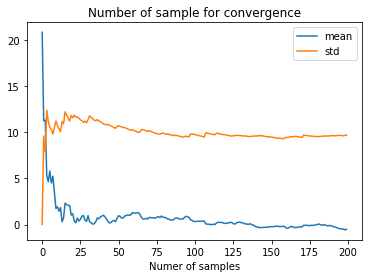

In [7]:
m = 200
sample = np.random.normal(0,10,m)
means = [np.mean(sample[:i+1]) for i in range(m)]
stds = [np.std(sample[:i+1]) for i in range(m)]
plt.plot(means,label='mean')
plt.plot(stds,label='std')
plt.legend()
plt.title('Number of sample for convergence')
plt.xlabel('Numer of samples')
plt.show()

## Multivariate distribution

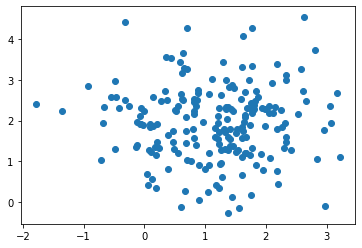

In [37]:
m = 200
mean = (1, 2)
cov = [[1, 0], 
       [0, 1]]
sample = np.random.multivariate_normal(mean, cov, m)
plt.scatter(sample[:,0],sample[:,1])

In [43]:
sample.mean(axis=0), np.cov(sample,rowvar=0)

(array([1.14465195, 1.94068878]), array([[8.35927124e-01, 6.29258682e-04],
        [6.29258682e-04, 8.36830192e-01]]))

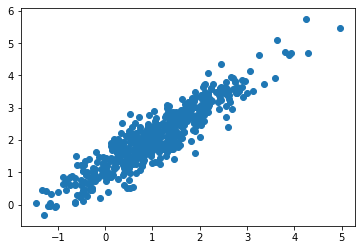

In [45]:
m = 500
mean = (1, 2)
cov = [[1,0.9], 
       [0.9,1]]
sample = np.random.multivariate_normal(mean, cov, m)
plt.scatter(sample[:,0],sample[:,1])

In [46]:
sample.mean(axis=0), np.cov(sample,rowvar=0)

(array([1.02986655, 2.0618727 ]), array([[1.03929479, 0.91627266],
        [0.91627266, 0.96892303]]))

### Assuming independence

In [50]:
estim_mean = sample.mean(axis=0)
estim_std = sample.std(axis=0)
estim_mean, estim_std
# sample = np.random.multivariate_normal(mean, cov, m)
# plt.scatter(sample[:,0],sample[:,1])

(array([1.02986655, 2.0618727 ]), array([1.01843812, 0.98335405]))

- Factorization
- Independence

## UMDA
http://sites.nlsde.buaa.edu.cn/~kexu/benchmarks/set-benchmarks.htm

- What happens if the sample is too small (say 10)?

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


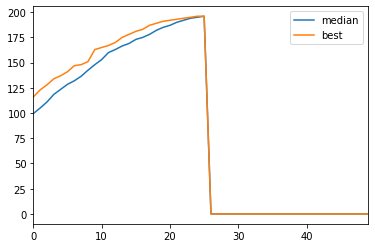

In [39]:
m = 50
n = 200
geners = 50
pop = np.random.randint(2, size=(m,n))


medians, bests = [], []

for gener in range(geners):
    fitnesses = np.array([pop[i,:].sum() for i in range(m)])
    median = np.median(fitnesses)
    best = np.max(fitnesses)
    medians.append(median)
    bests.append(best)
    distri = pop[fitnesses>median].mean(axis=0)
    pop = np.random.rand(m,n) # a whole new sample!!
    for i in range(m):
        for j in range(n):
            if pop[i,j] < distri[j]:
                pop[i,j] = 1
            else:
                pop[i,j] = 0
df = pd.DataFrame()
df['median'] = medians
df['best'] = bests
df.plot()

## random permutations to preference matrix

In [ ]:
n = 5
m = 10
pairwise = np.zeros((n,n))
for repe in range(m):
    perm = np.random.permutation(n)
    print(perm)
    for i in range(n):
        for j in range(i+1,n):
            if perm[i]>perm[j]:
                pairwise[i,j] +=1
            else:
                pairwise[j,i] +=1
pairwise/m

## Mallows

In [14]:

s = np.array([0,1,2,3])
p = np.array([2,1,0,3])
mk.compose(s,p), s[p]

(array([2, 1, 0, 3]), array([2, 1, 0, 3]))

In [11]:
import mallows_kendall as mk
n=10
m=5
sample = mk.samplingMM(m,n,theta=1)
sample

array([[5, 7, 0, 2, 6, 3, 1, 8, 9, 4],
       [8, 3, 2, 7, 6, 4, 1, 0, 9, 5],
       [0, 3, 1, 5, 7, 2, 8, 6, 4, 9],
       [1, 8, 9, 0, 5, 2, 7, 3, 6, 4],
       [9, 6, 7, 1, 5, 0, 4, 8, 2, 3]])

In [2]:
mk.fit_MM(sample)

(array([8, 5, 0, 6, 1, 2, 7, 4, 3, 9]), 0.359056548374786)

In [3]:
n = 11
m = 5
theta = 0.9
for theta in [0.0001,3]:
    print(theta)
    print(mk.samplingMM(m,n,theta=0.5))

0.0001
[[ 0.  3.  2.  5.  7.  1.  8.  9.  4.  6. 10.]
 [ 9.  0.  2.  1.  4.  3.  5.  8.  6.  7. 10.]
 [ 6.  4.  8.  7.  0.  3.  2.  9.  1.  5. 10.]
 [ 3.  1.  0.  6.  2.  5.  4.  7. 10.  8.  9.]
 [ 1.  3.  0.  2.  5.  4.  6.  7.  8.  9. 10.]]
3
[[ 5.  1.  0.  4. 10.  2.  3.  7.  6.  8.  9.]
 [ 2.  5.  7.  3.  4.  0. 10.  6.  1.  8.  9.]
 [ 0.  1.  4.  5.  3.  2.  6.  7.  8.  9. 10.]
 [ 0.  2.  3.  5.  1.  4.  6. 10.  7.  8.  9.]
 [ 0.  1.  6.  3.  2.  4.  8. 10.  9.  5.  7.]]


### How many samples do we need for learning?

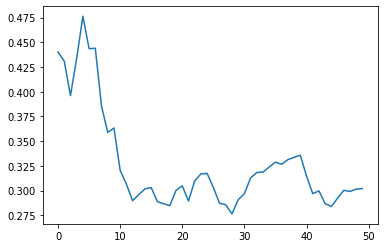

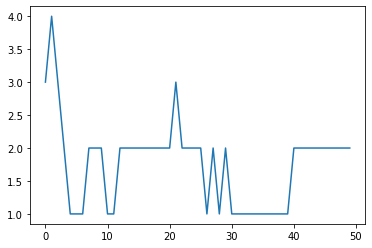

In [7]:
import matplotlib.pyplot as plt
import numpy as np
n = 7
theta = 0.3
ident = np.arange(n)
dists = []
thetas = []
sample = mk.samplingMM(10,n,theta) 
for m in range(50):
    perm = mk.samplingMM(1,n,theta)
    sample = np.concatenate((sample,perm))
    s,t = mk.fit_MM(sample)
    thetas.append(t)
    dists.append(mk.kendallTau(s,ident))
plt.plot(thetas)
plt.show()
plt.plot(dists)
plt.show()

### FSP
- intensification / diversification


0.05238536184427571 1391
0.05010330095736532 1387
0.060534701056710986 1387
0.08476968651944086 1377
0.08646847604658484 1377
0.09167335302470667 1375
0.09655099997507124 1371
0.09818058241917423 1371
0.10260731925578243 1371
0.11430853068816305 1371
0.11472398918169367 1371
0.11250723114665061 1371
0.1077859483394508 1338
0.11838171893227355 1338
0.11531481414477378 1338
0.1185719618707804 1338
0.122877681720394 1338
0.11580784770311248 1338
0.1182824071592479 1338
0.12656009436122062 1338
0.1283450454117133 1338
0.1300661869570492 1338
0.12976128725147432 1338
0.1325515966195956 1338
0.13090415904787597 1338
0.13101738782061778 1338
0.13275806177408472 1338
0.13275806177408472 1338
0.13317135194034893 1338
0.13367322254814418 1338
0.1374357214476906 1338
0.13764507410212176 1338
0.1332833674794977 1338
0.12846832110320155 1338
0.13059610581050798 1338
0.13059610581050798 1338
0.12539882022009013 1338
0.12995944276736462 1338
0.1312271650978257 1338
0.13379219079449758 1338
0.13379219

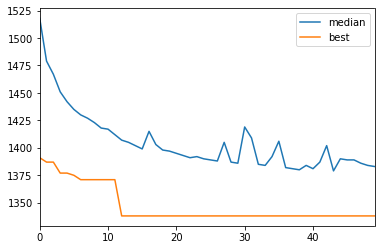

In [23]:
from imp import reload
reload(mk)
inst = mk.read_file("data/tai20_5_0.fsp")
m = 100
n,xx = inst.shape
geners = 50
pop = np.zeros((m,n), int)
for i in range(m):
    pop[i,:] = np.random.permutation(n)
medians, bests = [], []
for gener in range(geners):
    fitnesses = np.array([mk.fitness_fsp(pop[i][:], inst) for i in range(len(pop))])
    pop = pop[np.argsort(fitnesses)][:m] #first m only
    fitnesses = fitnesses[np.argsort(fitnesses)][:m] #first m only
    median = fitnesses[int(m/2)]
    best = fitnesses[0]
    medians.append(median)
    bests.append(best)
#      your code here
            
    
    
df = pd.DataFrame()
df['median'] = medians
df['best'] = bests
df.plot()

In [76]:
import itertools as it
def kendall(A, B=None):
    if B is None : B = list(range(len(A)))
    n = len(A)
    pairs = it.combinations(range(n), 2)
    distance = 0
    for x, y in pairs:
        a = A[x] - A[y]
        b = B[x] - B[y]
        if (a * b < 0):
            distance += 1
    return distance

In [62]:
import subprocess
command = 'Rscript'
path2script = 'data/bridgeMM.R'

def Rsample(n,m,theta, dist='k'):
    args = [str(m), str(n), str(theta)] + ['s'] + [dist]
    cmd = [command, path2script] + args
    x = subprocess.check_output(cmd, universal_newlines=True)
    sample = []
    for line in x.split("\n")[1:]:
        if "]" in line:
            #print(line)
            line = line.split("]")[1].split()
            line = [int(i) for i in line]
            sample.append(line)
    return np.array(sample)-1
def Rlearn(sample, dist='k'):
    m,n = sample.shape
    samplestr = [str(1+sample[i][j]) for i in range(m) for j in range(n)] 
    #    print(samplestr)
    args = [str(m), str(n)] + samplestr + ['a'] + [dist]
    cmd = [command, path2script] + args
    sample = subprocess.check_output(cmd, universal_newlines=True)
    #print(sample)
    theta = float(sample.split("\n")[4][4:])
    sigma0 = [int(i)-1 for i in sample.split("\n")[1].replace("[1]","").strip().split()]
    return theta, sigma0



In [63]:
sample = Rsample(n=5,m=3,theta=0.5)
sample

array([[0, 3, 1, 2, 4],
       [0, 2, 3, 4, 1],
       [2, 0, 3, 4, 1]])

In [65]:
Rlearn(sample)

(0.7461202, [0, 1, 3, 4, 2])

In [57]:
n = 11
m = 5
theta = 0.9
dist = 'k'
for theta in [0.0001,3]:
    print(theta)
    print(Rsample(n,m,theta, dist))

0
[[ 1  8  3  4  0  9 10  6  5  7  2]
 [ 7  6 10  4  1  8  0  9  5  2  3]
 [ 8  7 10  1  6  0  4  9  2  3  5]
 [ 8  7  6  1  5  3  4 10  0  9  2]
 [ 9  3  5  4  6 10  2  7  0  1  8]]
3
[[ 0  1  2  3  4  5  6  7  8  9 10]
 [ 0  1  2  3  4  5  6  7  8  9 10]
 [ 0  1  2  3  4  5  6  7  8  9 10]
 [ 0  1  2  3  4  5  6  7  8  9 10]
 [ 0  1  2  3  4  5  6  7  8  9 10]]


### How many samples do we need for learning?

- Does this result change as we change the original distribution?


In [86]:
n = 7
theta = 0.3
ident = np.arange(n)
dists = []
thetas = []
sample = Rsample(n,10,theta) 
for m in range(50):
    perm = Rsample(n,1,theta)
    sample = np.concatenate((sample,perm))
    t,s = Rlearn(sample)
#     print(t,s)
    thetas.append(t)
    dists.append(kendall(s,ident))

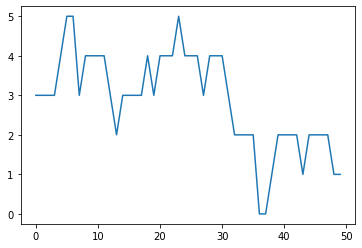

In [87]:
plt.plot(dists)

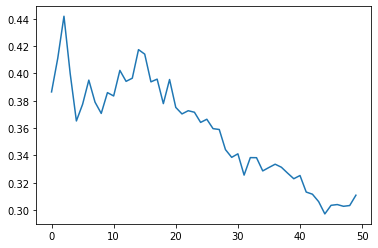

In [88]:
plt.plot(thetas)

### Chek the learning and sampling processes for different distances

In [ ]:
import subprocess
command = 'Rscript'
path2script = 'data/bridgeMM.R'
n = 11
m = 10
theta = 0.9



for dist in ['k','c','h']:#,'u'
    for theta in [0.1,3]:
        sample = Rsample(52,20,theta, dist)
        print(theta, dist, Rlearn(sample, dist))

## EDA for the TSP
http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/index.html

- How do we check intensification?

